In [2]:
import numpy as np
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, mu1, mu2, F1, F2, w1, w2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1) + k2 * (x2 - x1)+ mu1*((x1)**3)+ mu2*((x1-x2)**3)+ F1*np.cos(w1*t)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1)+ mu2*((x2-x1)**3)+F2*np.cos(w2*t)) / m2]
    return f

In [3]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 2./5.
k2 = 1.0
# Natural lengths
L1 = 0.0
L2 = 0.0
# Friction coefficients
b1 = 1.0/10.0
b2 = 1.0/5.0

#Non-linear coefficients
mu1=1.0/6.0
mu2=1.0/10.0

#Forcing amplitudes
F1=1.0/3.0
F2=1.0/5.0

#Forcing frecuencies
w1=1.0
w2=3.0/5.0


# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.7
y1 = 0.0
x2 = 0.1
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 170
numpoints = 2500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, mu1, mu2, F1, F2, w1, w2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('nonlinearsprings4.1.dat', 'w') as f: # Print & save the solution. 
    for t1, w1 in zip(t, wsol): print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

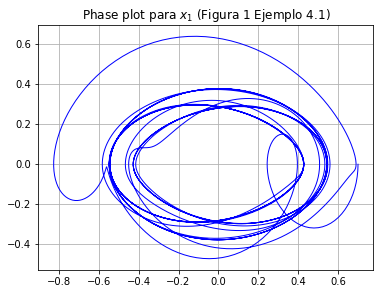

In [4]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
from matplotlib import pyplot as pl
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('nonlinearsprings4.1.dat', unpack=True)


figure(1, figsize=(6, 4.5))
lw=1
plot(x1,xy, 'b', linewidth=lw)
title("Phase plot para $x_1$ (Figura 1 Ejemplo 4.1)")
grid(True)
savefig("nonlinearsprings4.1.1.png", dpi=100)

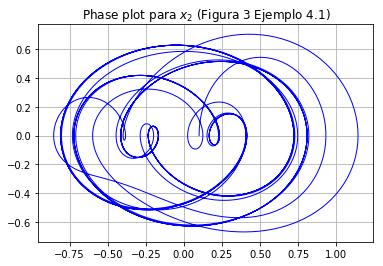

In [5]:
plot(x2,y2, 'b', linewidth=lw)
title("Phase plot para $x_2$ (Figura 3 Ejemplo 4.1)")
grid(True)
savefig("nonlinearsprings4.1.3.png", dpi=100)

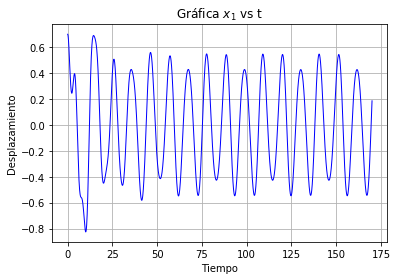

In [6]:
plot(t,x1, 'b', linewidth=lw)
title("Gráfica $x_1$ vs t")
grid(True)
pl.xlabel("Tiempo")
pl.ylabel("Desplazamiento")
savefig("nonlinearsprings4.1.5.png", dpi=100)

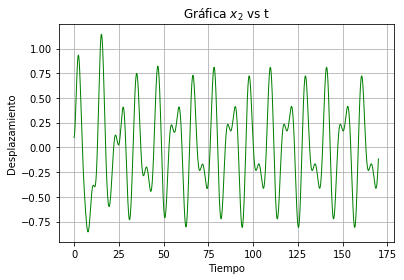

In [7]:
plot(t,x2, 'g', linewidth=lw)
title("Gráfica $x_2$ vs t")
grid(True)
pl.xlabel("Tiempo")
pl.ylabel("Desplazamiento")
savefig("nonlinearsprings4.1.6.png", dpi=100)

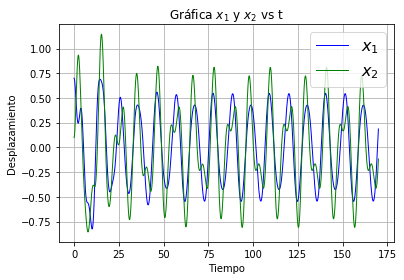

In [11]:
plot(t,x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)
title("Gráfica $x_1$ y $x_2$ vs t")
grid(True)
pl.xlabel("Tiempo")
pl.ylabel("Desplazamiento")
legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
savefig("nonlinearsprings4.1.7.png", dpi=100)

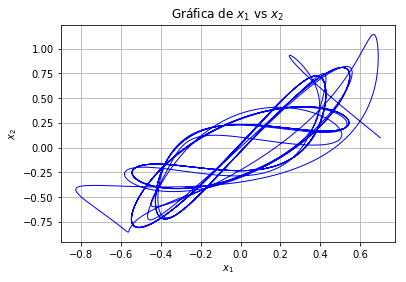

In [12]:
plot(x1,x2, 'b', linewidth=lw)
title("Gráfica de $x_1$ vs $x_2$")
grid(True)
pl.xlabel("$x_1$")
pl.ylabel("$x_2$")
savefig("nonlinearsprings4.1.8.png", dpi=100)